<a href="https://colab.research.google.com/github/PMartey/G2M-insight-/blob/main/EDA_on_Cab_Investment_Firm_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### G2M insight for Cab Investment firm
The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### The Data Set:

We have been provided 4 individual data sets. Time period of data is from 01/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users


### Created multiple hypothesis and investigate:

I will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

Areas to investigate:

1. Is there any seasonality in number of customers using the cab service?
2. Which company has maximum cab users at a particular time period?
3. Does margin proportionally increase with increase in number of customers?
4. What are the attributes of these customer segments?
5. Are there cities with higher cab users?

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in all 4 file and prepare to merge as one dataset

In [2]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
print("Dimension of the cab data set:", cab_data.shape)

cab_data.head()


Dimension of the cab data set: (359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
city = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
print("Dimension of the city data set:",city.shape)
city.head(5)

Dimension of the city data set: (20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
customer_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
print("Dimension of the customer data set:", customer_ID.shape)
customer_ID.head()

Dimension of the customer data set: (49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
transaction_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
print("Dimension of the transaction data set:", transaction_ID.shape)
transaction_ID.head()


Dimension of the transaction data set: (440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
# Checking unique values in each data set for transcation and customer ID
print(cab_data['Transaction ID'].nunique())
print(cab_data['Company'].unique())
print(transaction_ID[['Transaction ID','Customer ID']].nunique())
print(customer_ID['Customer ID'].nunique())

359392
['Pink Cab' 'Yellow Cab']
Transaction ID    440098
Customer ID        49171
dtype: int64
49171


#### Check for duplicates in all 4 data sets


In [7]:
print("Number of duplicates in car dataframe:", sum(cab_data.duplicated()))
print("Number of duplicates in customer ID dataframe:",sum(customer_ID.duplicated()))
print("Number of duplicates in transaction ID dataframe:",sum(transaction_ID.duplicated()))
print("Number of duplicates in city dataframe:", sum(city.duplicated()))
#so there are no duplicates in all 4 data sets

Number of duplicates in car dataframe: 0
Number of duplicates in customer ID dataframe: 0
Number of duplicates in transaction ID dataframe: 0
Number of duplicates in city dataframe: 0


Since there are no duplicates in all for data set
I am going ahead to merge all 3 data sets. First by transaction ID and then by customer ID

In [8]:
#merge cab data with transaction ID

m1 = pd.merge(cab_data, transaction_ID,on = "Transaction ID", how ="outer")
m1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [9]:
# merging m1 with customer ID
m2 = pd.merge(m1, customer_ID , on = "Customer ID", how = "outer")
m2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [10]:
#looking at the data types of my m2 and frame data frames
m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      440098 non-null  int64  
 1   Date of Travel      359392 non-null  float64
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         440098 non-null  int64  
 8   Payment_Mode        440098 non-null  object 
 9   Gender              440098 non-null  object 
 10  Age                 440098 non-null  int64  
 11  Income (USD/Month)  440098 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 40.3+ MB


In [11]:
# convert transaction ID and customer ID in m2 to string
m2[['Transaction ID', 'Customer ID']] = m2[['Transaction ID', 'Customer ID']].astype(str)

In [12]:
m2.describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,359392.000000,440098.000000,440098.000000
mean,42964.067998,22.567254,423.443311,286.190113,35.360197,15092.181989
std,307.467197,12.233526,274.378911,157.993661,12.582668,7987.309505
min,42371.000000,1.900000,15.600000,19.000000,18.000000,2000.000000
25%,42697.000000,12.000000,206.437500,151.200000,25.000000,8391.000000
50%,42988.000000,22.440000,386.360000,282.480000,33.000000,14767.000000
75%,43232.000000,32.960000,583.660000,413.683200,42.000000,21084.000000
max,43465.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000


### Finding Z-scores to search for outliers in age, and income

In [13]:
from scipy import stats

m2['Age_z']= stats.zscore(m2['Age'])
m2['Income (USD/Month)_z']= stats.zscore(m2['Income (USD/Month)'])
m2.describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Age_z,Income (USD/Month)_z
count,359392.000000,359392.000000,359392.000000,359392.000000,440098.000000,440098.000000,4.400980e+05,4.400980e+05
mean,42964.067998,22.567254,423.443311,286.190113,35.360197,15092.181989,7.013433e-17,-1.007454e-17
std,307.467197,12.233526,274.378911,157.993661,12.582668,7987.309505,1.000001e+00,1.000001e+00
min,42371.000000,1.900000,15.600000,19.000000,18.000000,2000.000000,-1.379693e+00,-1.639125e+00
25%,42697.000000,12.000000,206.437500,151.200000,25.000000,8391.000000,-8.233714e-01,-8.389796e-01
50%,42988.000000,22.440000,386.360000,282.480000,33.000000,14767.000000,-1.875755e-01,-4.071238e-02
75%,43232.000000,32.960000,583.660000,413.683200,42.000000,21084.000000,5.276950e-01,7.501681e-01
max,43465.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000,2.355608e+00,2.492434e+00


In [14]:
m2_sort = m2.sort_values(['Age_z'])
m2_sort['Age_z'].tail() # you can change tail to head to see the lowest values

## since there are no z_score < -3 and > 3 there are no outliers in the data set, even by looking at the summary data above

222906    2.355608
222905    2.355608
222904    2.355608
222914    2.355608
252890    2.355608
Name: Age_z, dtype: float64

### Handling Missing values


In [15]:
sum(m2.duplicated()) # no duplicates
sum(m2['Cost of Trip'].isna())
##checking for null valuess
m2.isna().sum()

Transaction ID              0
Date of Travel          80706
Company                 80706
City                    80706
KM Travelled            80706
Price Charged           80706
Cost of Trip            80706
Customer ID                 0
Payment_Mode                0
Gender                      0
Age                         0
Income (USD/Month)          0
Age_z                       0
Income (USD/Month)_z        0
dtype: int64

In [16]:
m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Transaction ID        440098 non-null  object 
 1   Date of Travel        359392 non-null  float64
 2   Company               359392 non-null  object 
 3   City                  359392 non-null  object 
 4   KM Travelled          359392 non-null  float64
 5   Price Charged         359392 non-null  float64
 6   Cost of Trip          359392 non-null  float64
 7   Customer ID           440098 non-null  object 
 8   Payment_Mode          440098 non-null  object 
 9   Gender                440098 non-null  object 
 10  Age                   440098 non-null  int64  
 11  Income (USD/Month)    440098 non-null  int64  
 12  Age_z                 440098 non-null  float64
 13  Income (USD/Month)_z  440098 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usage: 47.

In [17]:
df1 = m2.fillna({'Date of Travel' : m2['Date of Travel'].median(), 'Company':"Unknown", 'City':"Unknown", 'KM Travelled':  m2['KM Travelled'].median(),
                'Price Charged':m2['Price Charged'].median(), 'Cost of Trip':m2['Cost of Trip'].median()})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Transaction ID        440098 non-null  object 
 1   Date of Travel        440098 non-null  float64
 2   Company               440098 non-null  object 
 3   City                  440098 non-null  object 
 4   KM Travelled          440098 non-null  float64
 5   Price Charged         440098 non-null  float64
 6   Cost of Trip          440098 non-null  float64
 7   Customer ID           440098 non-null  object 
 8   Payment_Mode          440098 non-null  object 
 9   Gender                440098 non-null  object 
 10  Age                   440098 non-null  int64  
 11  Income (USD/Month)    440098 non-null  int64  
 12  Age_z                 440098 non-null  float64
 13  Income (USD/Month)_z  440098 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usage: 47.

In [18]:
# create a contigency table
table1 = pd.crosstab(df1['Gender'] ,df1['Company'])
table1

Company,Pink Cab,Unknown,Yellow Cab
Gender,,,
Female,37480,30007,116000
Male,47231,50699,158681


In [19]:
# create a contigency table
table2 = pd.crosstab(df1['Payment_Mode'] ,df1['Company'])
table2

Company,Pink Cab,Unknown,Yellow Cab
Payment_Mode,,,
Card,50719,48487,164785
Cash,33992,32219,109896


In [20]:
# create a contigency table
table3 = pd.crosstab(df1['City'] ,df1['Company'])
table3

Company,Pink Cab,Unknown,Yellow Cab
City,,,
ATLANTA GA,1762,0,5795
AUSTIN TX,1868,0,3028
BOSTON MA,5186,0,24506
CHICAGO IL,9361,0,47264
DALLAS TX,1380,0,5637
DENVER CO,1394,0,2431
LOS ANGELES CA,19865,0,28168
MIAMI FL,2002,0,4452
NASHVILLE TN,1841,0,1169


Looks like there are customers who didn't use the Pink or Yellow cab with Unknown cites so we will drop the null values and work with the non null values.
We can determine the cab type and cities through futher analysis of current data sets

### Drop na's

In [21]:
#df2 = m2.dropna(how="all") # how ='all' will drop only rows that are all NA
df2 = m2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359392 entries, 0 to 359890
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Transaction ID        359392 non-null  object 
 1   Date of Travel        359392 non-null  float64
 2   Company               359392 non-null  object 
 3   City                  359392 non-null  object 
 4   KM Travelled          359392 non-null  float64
 5   Price Charged         359392 non-null  float64
 6   Cost of Trip          359392 non-null  float64
 7   Customer ID           359392 non-null  object 
 8   Payment_Mode          359392 non-null  object 
 9   Gender                359392 non-null  object 
 10  Age                   359392 non-null  int64  
 11  Income (USD/Month)    359392 non-null  int64  
 12  Age_z                 359392 non-null  float64
 13  Income (USD/Month)_z  359392 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usage: 41.1+ MB

In [22]:
# create a contigency table for Gender with Company
table3 = pd.crosstab( df2['Company'],'count')
table3

col_0,count
Company,
Pink Cab,84711
Yellow Cab,274681


<Axes: xlabel='Company', ylabel='Count'>

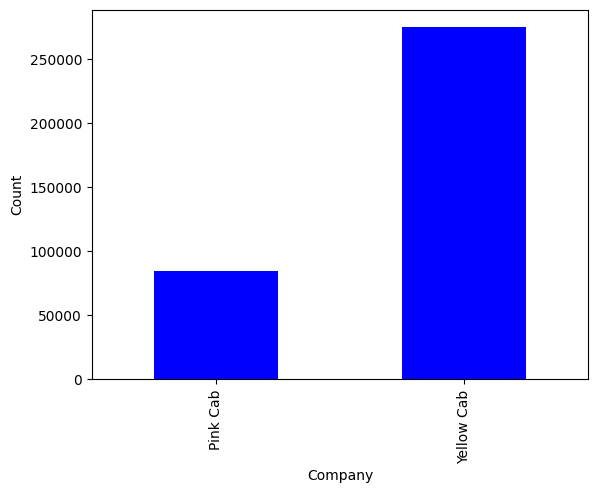

In [23]:
# Bar graph of City, with company overlay
table3.plot.bar(xlabel = 'Company', ylabel='Count', color=['b'], legend = False)

In [24]:
# create a contigency table for Gender with Company
table4 = pd.crosstab(df2['Gender'] ,df2['Company'])
table4

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


<Axes: xlabel='Gender', ylabel=' Company Count'>

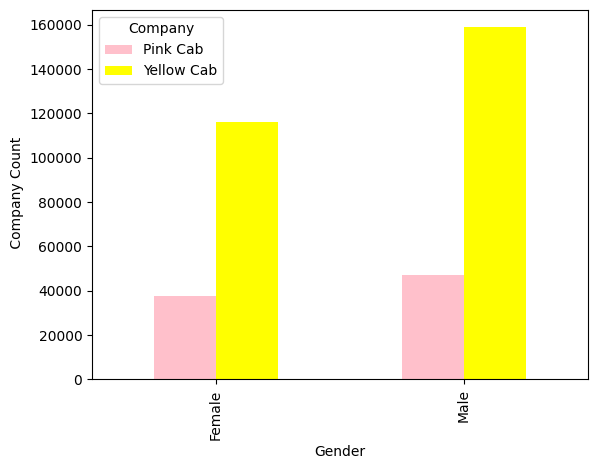

In [25]:
# Bar graph of City, with company overlay
table4.plot.bar(xlabel = 'Gender', ylabel=' Company Count', color=['pink', 'yellow'], stacked = False)

Comments:The number of both male pink and yellow cab users are higher than females

In [26]:
# create a contigency table for Payment type with Company
table5 = pd.crosstab(df2['Payment_Mode'] ,df2['Company'])
table5

Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,50719,164785
Cash,33992,109896


<Axes: xlabel='Payment Type', ylabel=' Company Count'>

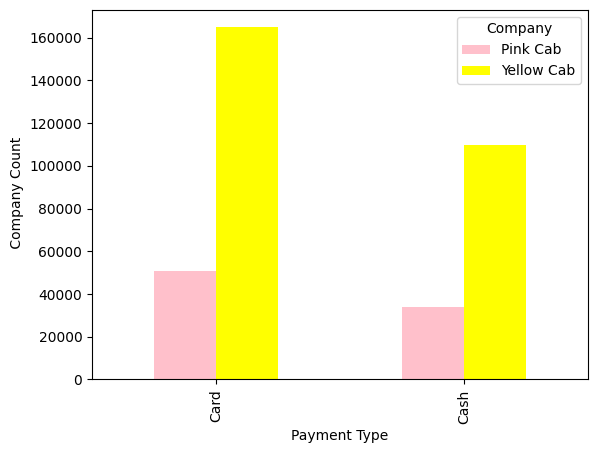

In [27]:
# Bar graph of Payment type, with company overlay
table5.plot.bar(xlabel = 'Payment Type', ylabel=' Company Count', color=['pink', 'yellow'], stacked = False)

Comments:The number of customers paying by card is relatively higher for pink and yellow cab users than payment by cash.

In [28]:
# create a contigency table for City with Company
table6 = pd.crosstab(df2['City'] ,df2['Company'])
table6

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


<Axes: xlabel='City', ylabel=' Company Count'>

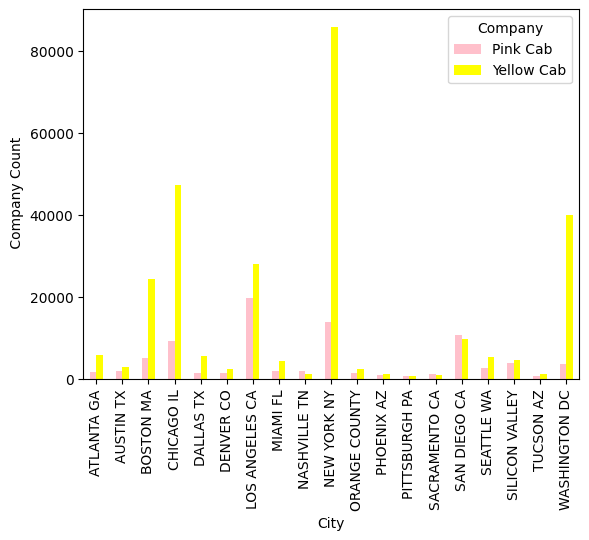

In [29]:
# Bar graph of City, with company overlay
table6.plot.bar(xlabel = 'City', ylabel=' Company Count', color=['pink', 'yellow'], stacked = False)

Cities such as Newyork, Chicago, Washington DC, Los Angeles, and Boston have a higher number of pink and yellow cab users. However, the yellow cab users remain dominant in these 5 cites

In [30]:
#the code in the block creates a correlation matrix of the numerical data
corr = df2.iloc[:,[1,4,5,6,10,11]].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
Date of Travel,1.000000,-0.001621,-0.055559,-0.004484,-0.001346,-0.001368
KM Travelled,-0.001621,1.000000,0.835753,0.981848,-0.000369,-0.000544
Price Charged,-0.055559,0.835753,1.000000,0.859812,-0.003084,0.003228
Cost of Trip,-0.004484,0.981848,0.859812,1.000000,-0.000189,-0.000633
Age,-0.001346,-0.000369,-0.003084,-0.000189,1.000000,0.003907
Income (USD/Month),-0.001368,-0.000544,0.003228,-0.000633,0.003907,1.000000


Features such as KM Travelled, Price Charged and Cost of Trip are highly positively correlated  
Whereas, Date of Travel, age and monthly income have no correlation.

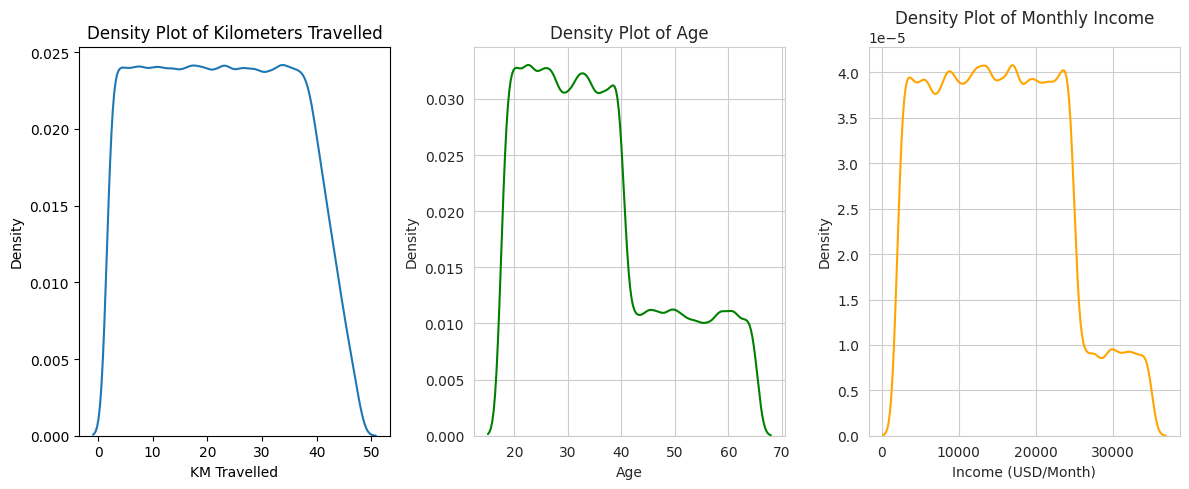

In [31]:
# create a density plot on km traveled, Age and Monthly Income to know the distribution of these factors

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.set_style('whitegrid')
sns.kdeplot(df2['KM Travelled'], label= 'km Travelled')
plt.title('Density Plot of Kilometers Travelled')
#plt.legend()
#plt.subplot(1, 4, 2)
#sns.set_style('whitegrid')
#sns.kdeplot(df2['Cost of Trip'], color = 'red', label= 'Cost of Trip')
#plt.title('Density Plot of Cost of Trip')


plt.subplot(1, 3, 2)
sns.set_style('whitegrid')
sns.kdeplot(df2['Age'], color = 'Green', label= 'Cost of Trip')
plt.title('Density Plot of Age')


plt.subplot(1, 3, 3)
sns.set_style('whitegrid')
sns.kdeplot(df2['Income (USD/Month)'], color = 'orange', label= 'Monthly Income')
plt.title('Density Plot of Monthly Income')
# Display the plots
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

(array([57893., 59136., 55892., 44891., 49178., 19684., 16034., 18608.,
        19165., 18911.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

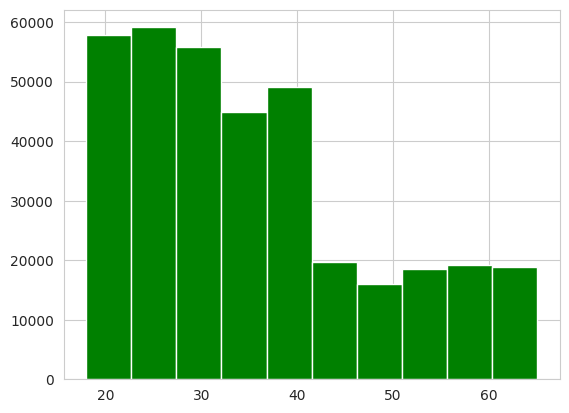

In [32]:
plt.hist(df2['Age'], color = 'green', label= 'Cost of Trip')

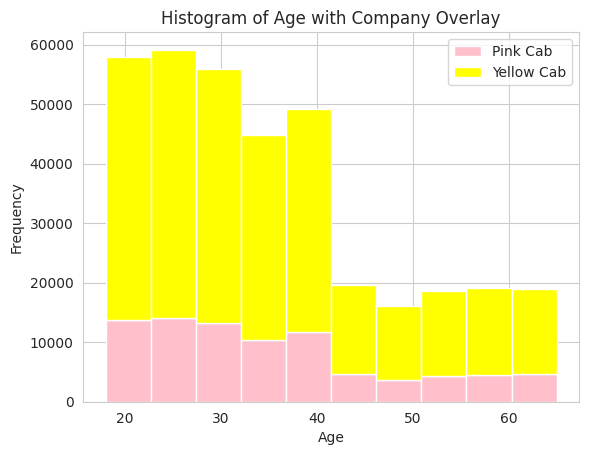

In [33]:
cab_yellow = df2[df2['Company']== 'Yellow Cab']['Age']
cab_pink=  df2[df2['Company']== 'Pink Cab']['Age']

#plot the histogram for 'age' and 'response' variables.
plt.hist([ cab_pink, cab_yellow], bins = 10, stacked = True, color=['pink', 'yellow'])
plt.legend([ 'Pink Cab','Yellow Cab'])
plt.title('Histogram of Age with Company Overlay')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-34-a87d21d48f33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company', data=df2, palette=['pink', 'yellow'])


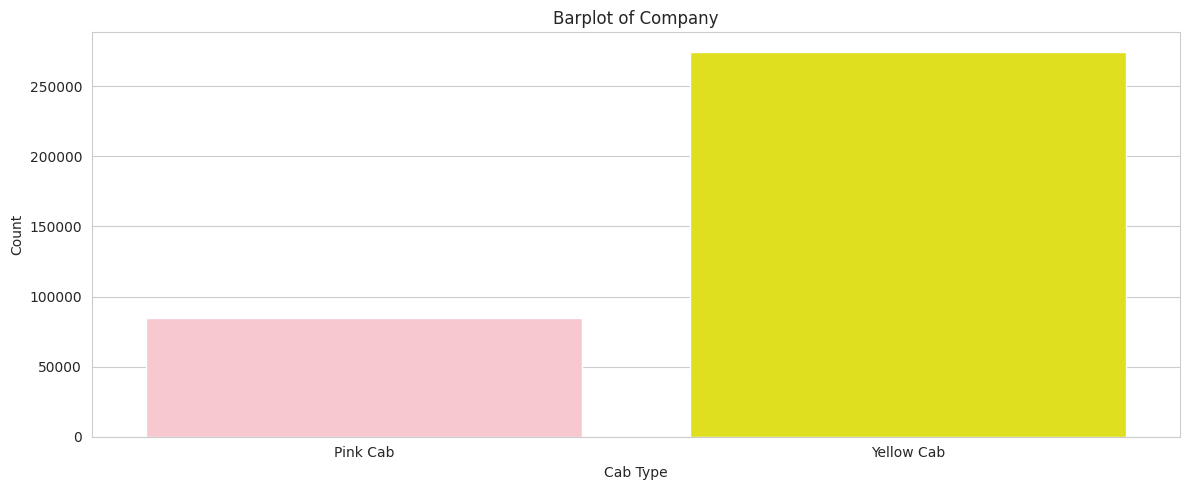

In [34]:
# Plotting the histogram for 'Age'
plt.figure(figsize=(12, 5))

# Plotting the count plot for 'Response'
plt.subplot(1, 1, 1)  # Creating the second subplot for 'Response'
sns.countplot(x='Company', data=df2, palette=['pink', 'yellow'])
plt.title('Barplot of Company')
plt.xlabel('Cab Type')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

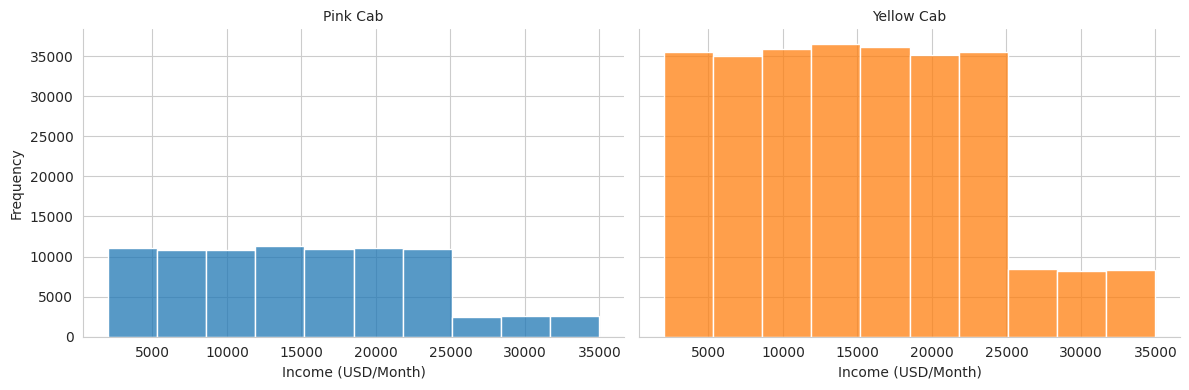

In [35]:
# Create the FacetGrid
g = sns.FacetGrid(df2, col="Company", hue="Company", col_wrap=2, height=4, aspect=1.5, sharey=True ) #, sharey=True

# Map the histplot to the FacetGrid
g.map(sns.histplot, "Income (USD/Month)", kde=False, bins=10)

# Add titles and labels
g.set_axis_labels('Income (USD/Month)', 'Frequency')
g.set_titles(col_template='{col_name}')

# Show the plot
plt.show()


In [36]:
dfsamp = df2.sample(700)


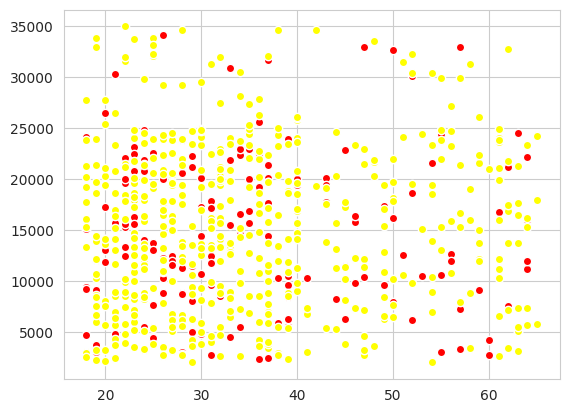

In [37]:
df2_subset1 = dfsamp[dfsamp['Company']=='Pink Cab']
plt.scatter( df2_subset1['Age'].values, df2_subset1["Income (USD/Month)"].values , edgecolors='white', facecolors='red', label='Target = 1')
# now, plot the data where the zipcode is not a target location
df2_subset2 = dfsamp[dfsamp['Company']=='Yellow Cab']
plt.scatter( df2_subset2['Age'].values, df2_subset2["Income (USD/Month)"].values , edgecolors='white', facecolors='yellow', label='Target = 1')


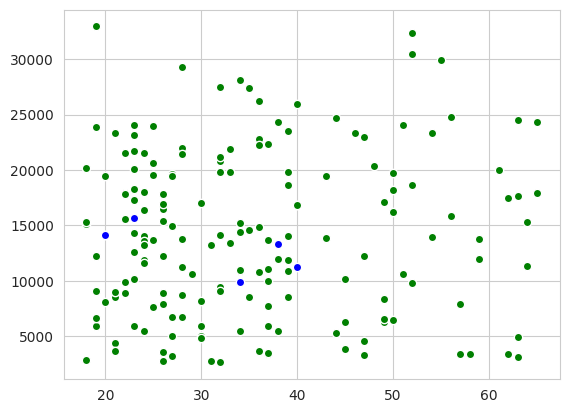

In [38]:
df2_subset1 = dfsamp[dfsamp['City']=='NEW YORK NY']
plt.scatter( df2_subset1['Age'].values, df2_subset1["Income (USD/Month)"].values , edgecolors='white', facecolors='green', label='Target = 1')
# now, plot the data where the zipcode is not a target location
df2_subset2 = dfsamp[dfsamp['City']=='PHOENIX AZ']
plt.scatter( df2_subset2['Age'].values, df2_subset2["Income (USD/Month)"].values , edgecolors='white', facecolors='blue', label='Target = 1')


In [39]:
table7 = pd.crosstab(df2['Date of Travel'], 'count')
table7

col_0,count
Date of Travel,
42371.0,181
42372.0,178
42373.0,25
42374.0,47
42375.0,109
...,...
43461.0,318
43462.0,843
43463.0,825


In [40]:
# Convert to a DataFrame (this step is redundant as crosstab already returns a DataFrame)
df_table7 = table7.reset_index()

# Rename the columns if needed
df_table7.columns = ['Date of Travel', 'count']

# Display the DataFrame
print(df_table7.head())

   Date of Travel  count
0         42371.0    181
1         42372.0    178
2         42373.0     25
3         42374.0     47
4         42375.0    109


In [41]:
from datetime import datetime, timedelta
# Function to convert numeric date to datetime
def convert_numeric_date(numeric_date):
    # Excel date format starts from 1899-12-30
    base_date = datetime(1899, 12, 30)
    return base_date + timedelta(days=numeric_date)

# Applying the conversion using a for loop
converted_dates = []
for date in df_table7['Date of Travel']:
    converted_dates.append(convert_numeric_date(date))

# Assign the converted dates back to the DataFrame
df_table7['Date of Travel_conv'] = converted_dates

# Display the DataFrame to verify the conversion
print(df_table7)

      Date of Travel  count Date of Travel_conv
0            42371.0    181          2016-01-02
1            42372.0    178          2016-01-03
2            42373.0     25          2016-01-04
3            42374.0     47          2016-01-05
4            42375.0    109          2016-01-06
...              ...    ...                 ...
1090         43461.0    318          2018-12-27
1091         43462.0    843          2018-12-28
1092         43463.0    825          2018-12-29
1093         43464.0    257          2018-12-30
1094         43465.0    256          2018-12-31

[1095 rows x 3 columns]


In [42]:

# Applying the conversion using a for loop
converted_dates = []
for date in df2['Date of Travel']:
    converted_dates.append(convert_numeric_date(date))

# Assign the converted dates back to the DataFrame
df2['Date of Travel'] = converted_dates

# Display the DataFrame to verify the conversion
df2.head()

<ipython-input-42-f26ef2bc7000>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date of Travel'] = converted_dates


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age_z,Income (USD/Month)_z
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,-0.584948,-0.535748
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,-0.584948,-0.535748
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,-0.584948,-0.535748
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,-0.664422,-0.733061
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,-0.664422,-0.733061


In [43]:
df2['Year'] = df2['Date of Travel'].dt.year #adding a new 'Year' column
df2['Month'] = df2['Date of Travel'].dt.month #adding a new 'Month' column

# Combine month and year into a single column
df2['month_year'] = df2['Date of Travel'].dt.strftime('%Y-%m')

df2['Profit'] = df2['Price Charged'] - df2['Cost of Trip']
df2['ProfitPercentage'] = ((df2['Price Charged'] - df2['Cost of Trip'])/df2['Cost of Trip'])*100

<ipython-input-43-528b3f1a7aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Date of Travel'].dt.year #adding a new 'Year' column
<ipython-input-43-528b3f1a7aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Date of Travel'].dt.month #adding a new 'Month' column
<ipython-input-43-528b3f1a7aa2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [44]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age_z,Income (USD/Month)_z,Year,Month,month_year,Profit,ProfitPercentage
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,-0.584948,-0.535748,2016,1,2016-01,57.3150,18.274427
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,-0.584948,-0.535748,2018,7,2018-07,281.2772,88.612790
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,-0.584948,-0.535748,2018,11,2018-11,194.6480,32.582415
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,-0.664422,-0.733061,2016,1,2016-01,23.6660,7.067558
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,-0.664422,-0.733061,2018,4,2018-04,253.9808,54.371732


In [45]:
df2.describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Age_z,Income (USD/Month)_z,Year,Month,Profit,ProfitPercentage
count,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,2017-08-17 01:37:55.042293504,22.567254,423.443311,286.190113,35.336705,15048.822937,-0.001867,-0.005428,2017.045199,7.500434,137.253198,47.523115
min,2016-01-02 00:00:00,1.900000,15.600000,19.000000,18.000000,2000.000000,-1.379693,-1.639125,2016.000000,1.000000,-220.060000,-40.933780
25%,2016-11-23 00:00:00,12.000000,206.437500,151.200000,25.000000,8424.000000,-0.823371,-0.834848,2016.000000,5.000000,28.012000,16.084529
50%,2017-09-10 00:00:00,22.440000,386.360000,282.480000,33.000000,14685.000000,-0.187575,-0.050979,2017.000000,8.000000,81.962000,35.925527
75%,2018-05-12 00:00:00,32.960000,583.660000,413.683200,42.000000,21035.000000,0.527695,0.744033,2018.000000,10.000000,190.030000,71.268038
max,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,65.000000,35000.000000,2.355608,2.492434,2018.000000,12.000000,1463.966000,320.214607
std,NaN,12.233526,274.378911,157.993661,12.594234,7969.409482,1.000920,0.997760,0.800239,3.445095,160.311840,42.571507


In [46]:
# dropping columns
df3 = df2.drop(columns= ['Age_z','Income (USD/Month)_z'])

In [47]:
# selecting only these columns
df3= df3.loc[:,['Date of Travel','Company']]

In [48]:
# Group by Date and Company and count the occurrences
grouped = df3.groupby(['Date of Travel', 'Company']).size().unstack(fill_value=0)

# Reset the index to make 'Date' a column again
grouped = grouped.reset_index()

# Rename columns for clarity
grouped.columns.name = None  # remove the name of the column index
grouped.columns = ['Date of Travel', 'Pink_Count', 'Yellow_Count']

# Merge the grouped counts back with the original DataFrame
#df_merged = pd.merge(df, grouped, on='Date', how='left')

# Display the final DataFrame
#print(df_merged)
grouped.shape

(1095, 3)

In [49]:
grouped.head()

,Date of Travel,Pink_Count,Yellow_Count
0,2016-01-02,41,140
1,2016-01-03,52,126
2,2016-01-04,4,21
3,2016-01-05,6,41
4,2016-01-06,23,86


In [50]:
grouped['Total_Count'] = grouped['Pink_Count'] + grouped['Yellow_Count']

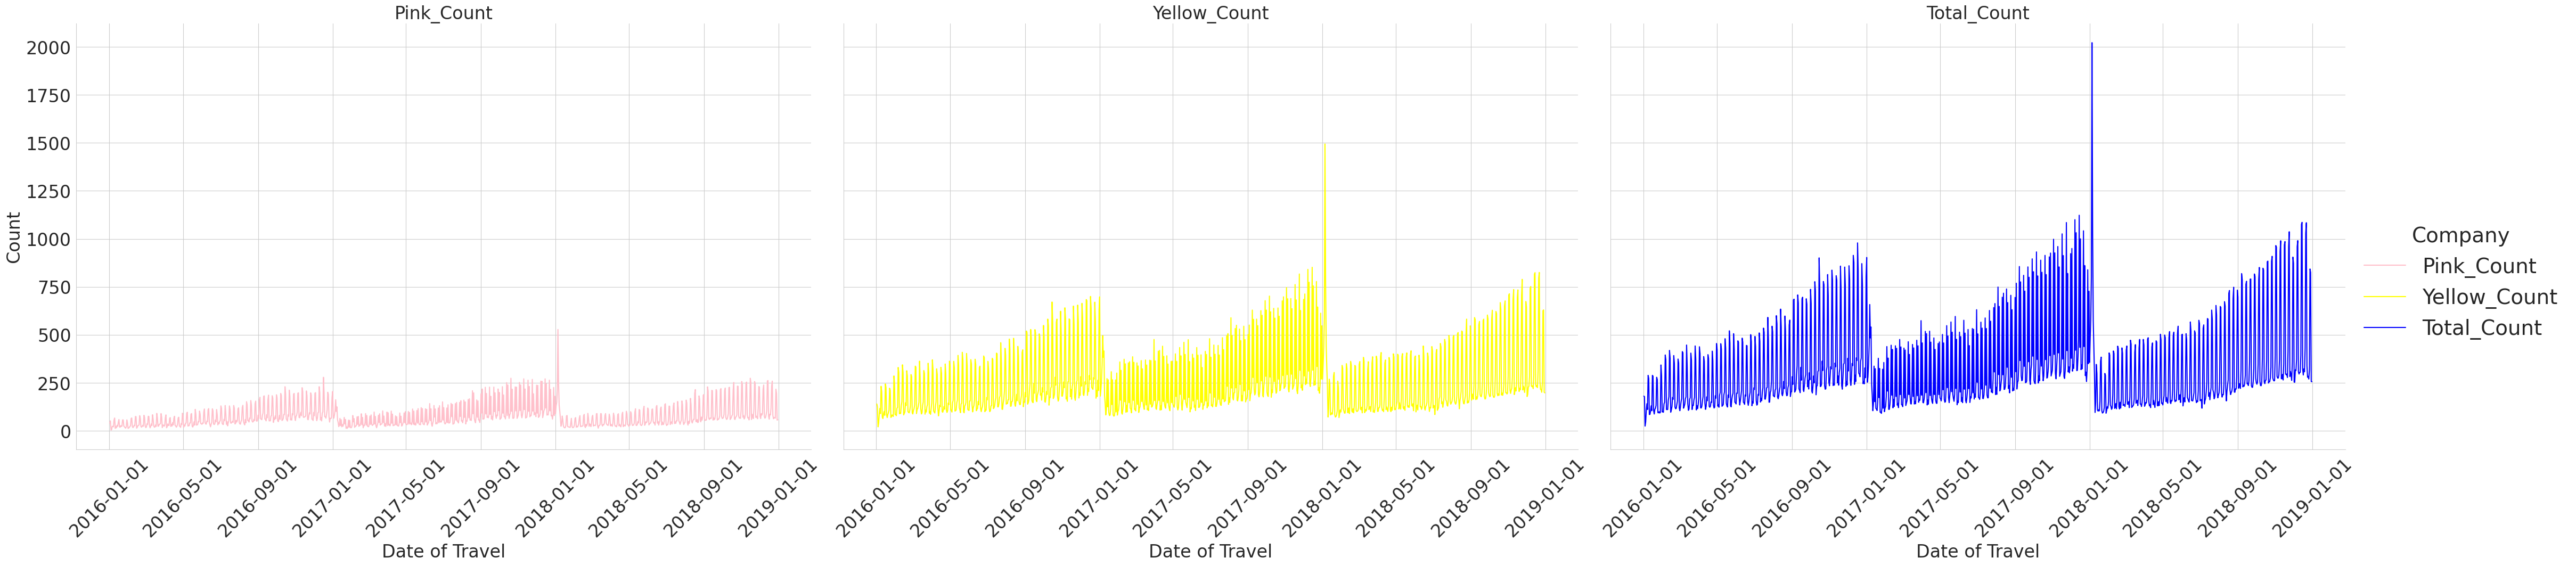

In [51]:
#seting my parameters
plt.rcParams.update({
    'axes.titlesize': 32,      # Title font size
    'axes.labelsize': 24,      # Axis label font size
    'xtick.labelsize': 24,     # X-tick label font size
    'ytick.labelsize': 24,     # Y-tick label font size
    'legend.fontsize': 28,     # Legend font size
    'font.size': 28            # General font size
})


# Melt the DataFrame
grouped_melted = grouped.melt(id_vars='Date of Travel', var_name='Company', value_name='Count')

# Define colors for each company
colors = {
    'Pink_Count': 'pink',
    'Yellow_Count': 'yellow',
    'Total_Count': 'blue'
}

# Create the FacetGrid
g = sns.FacetGrid(grouped_melted, col='Company', col_wrap=3, height=10, aspect=1.5, sharey=True, hue= 'Company', palette= colors)

# Map the lineplot to the FacetGrid with specific colors
#for company, color in colors.items():
   # g.map_dataframe(sns.lineplot, x='Date of Travel', y='Count', color=color).add_legend() # no markers  marker='o'
# Map the lineplot to the FacetGrid
g.map(sns.lineplot, 'Date of Travel', 'Count')

# Add titles and labels
g.set_axis_labels('Date of Travel', 'Count')
g.set_titles('{col_name}')
g.add_legend()

# Rotate the x-axis labels for better readability
for ax in g.axes.flatten():
    ax.set_xticks(ax.get_xticks())  # Set tick locations
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Set tick labels with rotation


# Show the plot
plt.show()

In [52]:
grouped_melted.head()

,Date of Travel,Company,Count
0,2016-01-02,Pink_Count,41
1,2016-01-03,Pink_Count,52
2,2016-01-04,Pink_Count,4
3,2016-01-05,Pink_Count,6
4,2016-01-06,Pink_Count,23


In [53]:
grouped_melted.shape

(3285, 3)

In [54]:
# Group by Date and Company and count the occurrences
grouped2 = df2.groupby(['Date of Travel', 'Company','Payment_Mode']).size().unstack(fill_value=0)

# Reset the index to make 'Date' a column again
grouped2 = grouped2.reset_index()

# Rename columns for clarity
grouped2.columns.name = None  # remove the name of the column index
grouped2.columns = ['Date of Travel', 'Company','Card','Cash']

# Merge the grouped counts back with the original DataFrame
#df_merged = pd.merge(df, grouped, on='Date', how='left')

# Display the final DataFrame
#print(df_merged)
grouped2.shape

(2190, 4)

In [55]:
grouped2.head()

,Date of Travel,Company,Card,Cash
0,2016-01-02,Pink Cab,23,18
1,2016-01-02,Yellow Cab,80,60
2,2016-01-03,Pink Cab,26,26
3,2016-01-03,Yellow Cab,75,51
4,2016-01-04,Pink Cab,2,2


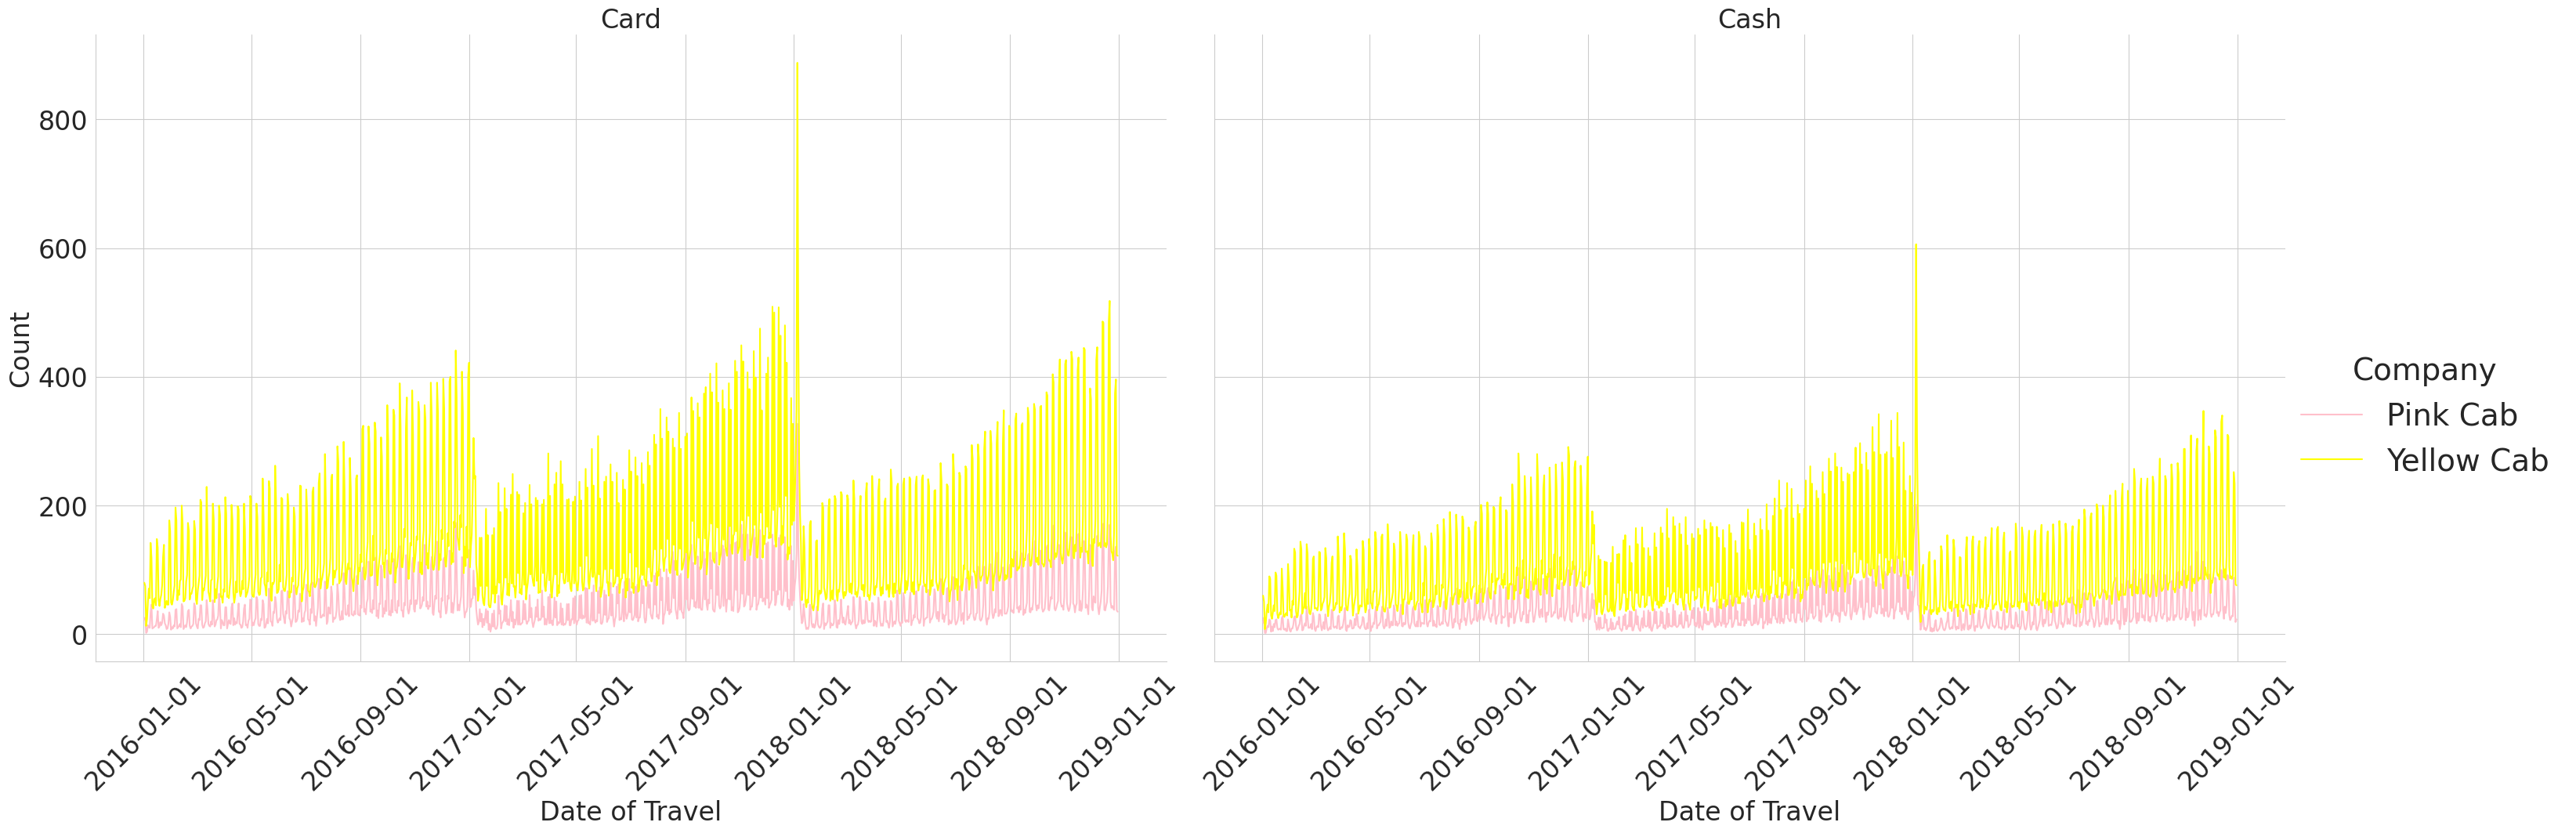

In [56]:
#seting my parameters
plt.rcParams.update({
    'axes.titlesize': 32,      # Title font size
    'axes.labelsize': 24,      # Axis label font size
    'xtick.labelsize': 24,     # X-tick label font size
    'ytick.labelsize': 24,     # Y-tick label font size
    'legend.fontsize': 28,     # Legend font size
    'font.size': 28            # General font size
})


# Melt the DataFrame
grouped_melted2 = grouped2.melt(id_vars=['Date of Travel','Company'], var_name='Payment_Method', value_name='Count')

# Define colors for each company
colors = {
    'Pink Cab': 'pink',
    'Yellow Cab': 'yellow',
    'Total': 'blue'
}

# Create the FacetGrid
g2 = sns.FacetGrid(grouped_melted2, col='Payment_Method', col_wrap=2, height=10, aspect=1.5, sharey=True, hue= 'Company', palette= colors)

# Map the lineplot to the FacetGrid with specific colors
#for company, color in colors.items():
   # g.map_dataframe(sns.lineplot, x='Date of Travel', y='Count', color=color).add_legend() # no markers  marker='o'
# Map the lineplot to the FacetGrid
g2.map(sns.lineplot, 'Date of Travel', 'Count')

# Add titles and labels
g2.set_axis_labels('Date of Travel', 'Count')
g2.set_titles('{col_name}')
g2.add_legend()

# Rotate the x-axis labels for better readability
for ax in g2.axes.flatten():
    ax.set_xticks(ax.get_xticks())  # Set tick locations
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Set tick labels with rotation


# Show the plot
plt.show()

In [57]:
# Melt the DataFrame
#grouped_melted2 = grouped2.melt(id_vars=['Date of Travel','Company'], var_name='Payment_Method', value_name='Count')
grouped_melted2.head()

,Date of Travel,Company,Payment_Method,Count
0,2016-01-02,Pink Cab,Card,23
1,2016-01-02,Yellow Cab,Card,80
2,2016-01-03,Pink Cab,Card,26
3,2016-01-03,Yellow Cab,Card,75
4,2016-01-04,Pink Cab,Card,2


In [58]:
#Change company as boolean and perform a hypothesis test to see which features influence a customer to choose yellow or pink cab
df2['Company_numeric'] = df2['Company'].map({'Pink Cab': 1, 'Yellow Cab': 0})


<ipython-input-58-7ffa18e34e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Company_numeric'] = df2['Company'].map({'Pink Cab': 1, 'Yellow Cab': 0})


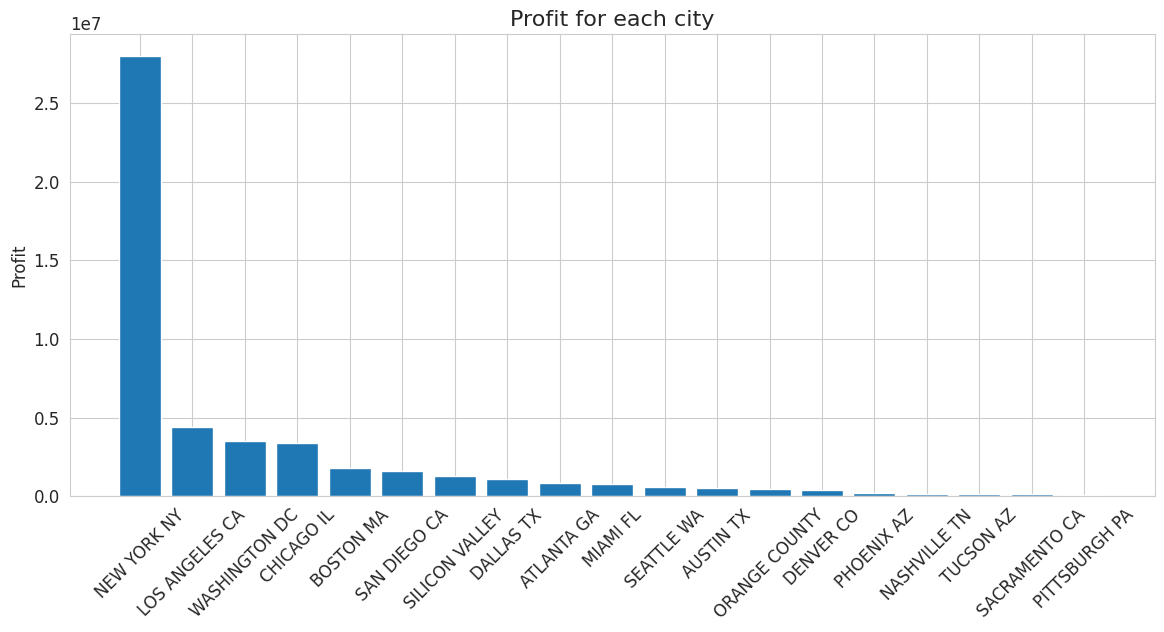

                    Profit
City                      
NEW YORK NY     27962555.0
LOS ANGELES CA   4411709.0
WASHINGTON DC    3492870.0
CHICAGO IL       3387313.0
BOSTON MA        1768719.0
SAN DIEGO CA     1587163.0
SILICON VALLEY   1316705.0
DALLAS TX        1128733.0
ATLANTA GA        842433.0
MIAMI FL          758301.0
SEATTLE WA        604685.0
AUSTIN TX         526701.0
ORANGE COUNTY     457002.0
DENVER CO         397585.0
PHOENIX AZ        192941.0
NASHVILLE TN      149532.0
TUCSON AZ         140261.0
SACRAMENTO CA     117326.0
PITTSBURGH PA      85166.0


In [59]:
profit_df = pd.DataFrame(df2,columns = ["City","Profit"]).groupby("City").sum().sort_values(by = "Profit",ascending=False)
new_df = profit_df.round()


#seting my parameters
plt.rcParams.update({
    'axes.titlesize': 16,      # Title font size
    'axes.labelsize': 12,      # Axis label font size
    'xtick.labelsize': 12,     # X-tick label font size
    'ytick.labelsize': 12,     # Y-tick label font size
    'legend.fontsize': 14,     # Legend font size
    'font.size': 14            # General font size
})


plt.figure(figsize = (14,6))
plt.bar(new_df.index,new_df.Profit)
plt.xticks(rotation= 45)
plt.ylabel("Profit")
plt.title("Profit for each city")
plt.show()

print(new_df)


In [60]:
# Sort the DataFrame by 'date_traveled' in ascending order
df_sorted = df2.sort_values(by='month_year')

# Reset index if needed
df_sorted = df_sorted.reset_index(drop=True)

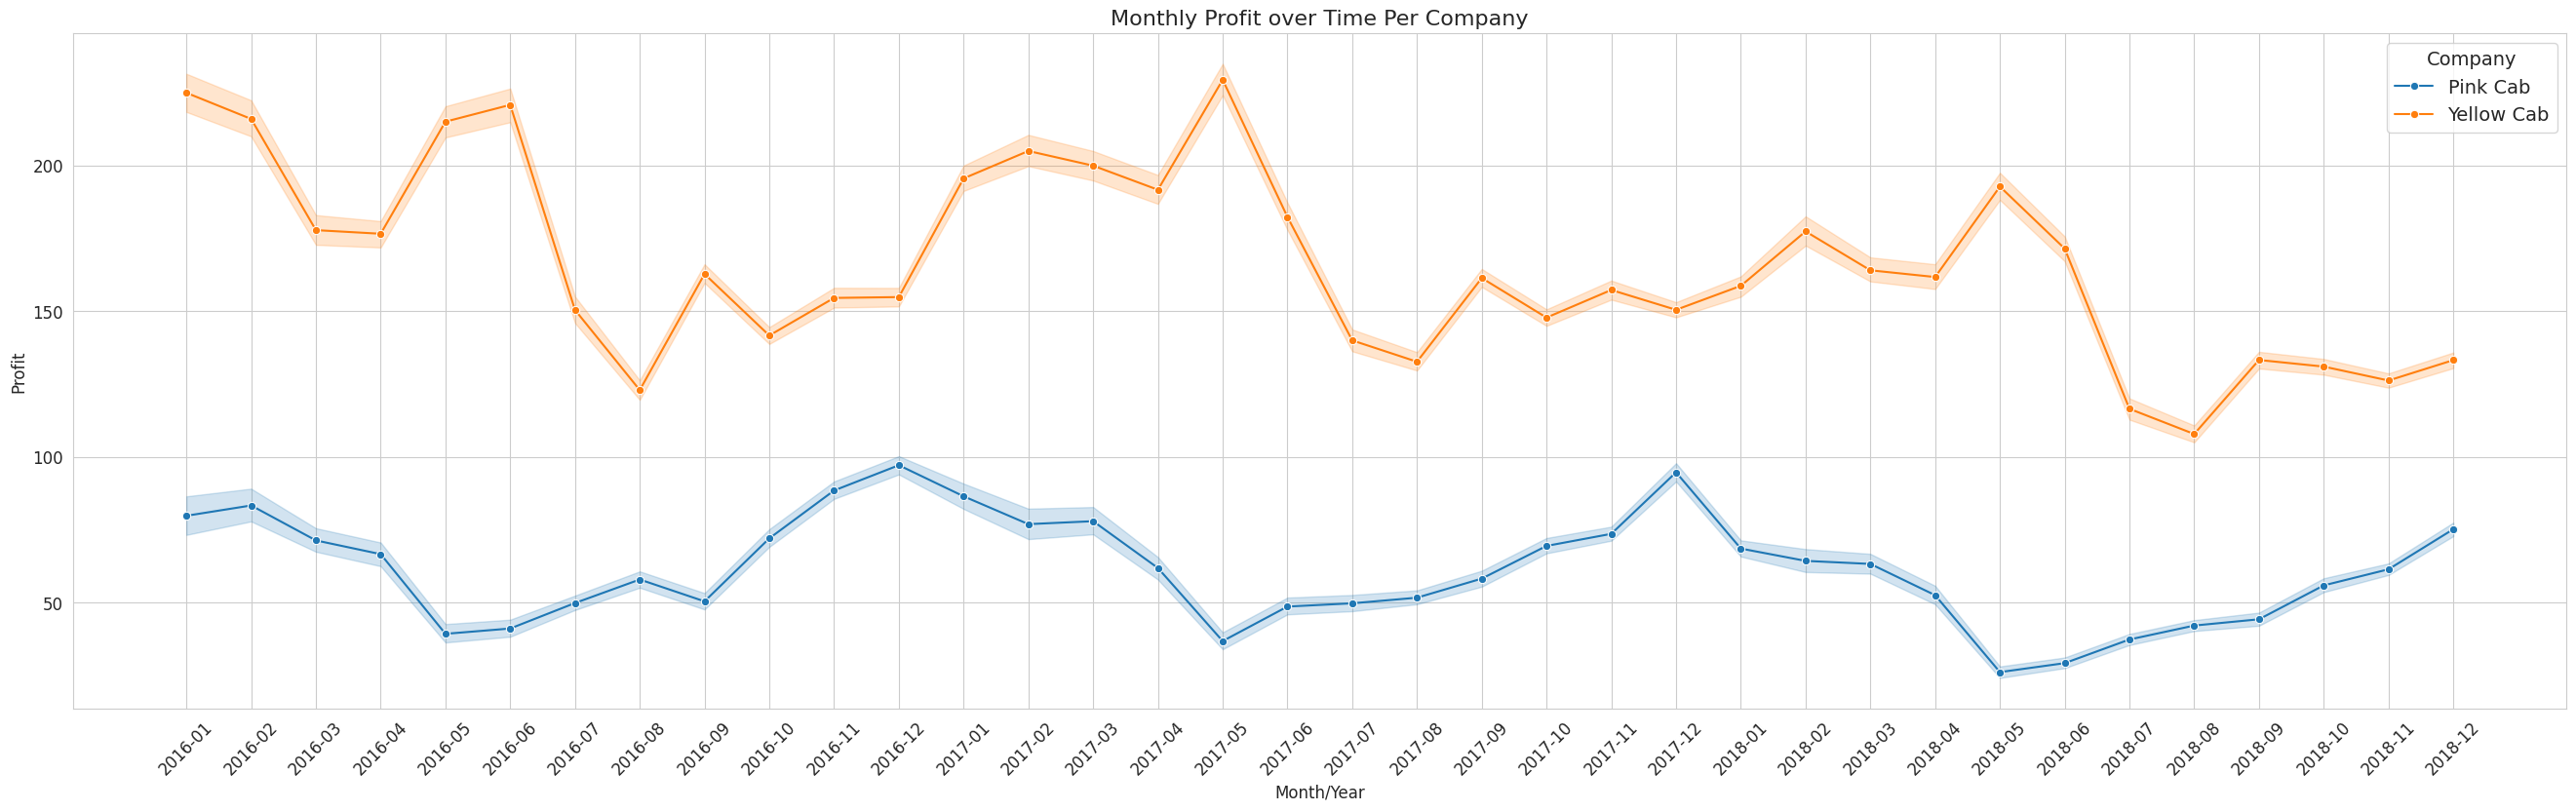

In [61]:
#create a side by side line plot for profits of each company
plt.figure(figsize=(33, 9))
sns.lineplot(data=df_sorted, x='month_year', y='Profit', hue='Company', marker='o')
plt.title('Monthly Profit over Time Per Company')
plt.xticks(rotation=45)
plt.xlabel('Month/Year')
plt.ylabel('Profit')
plt.show()



### Conclusion
I have evaluated both the cab companies on following points and found Yellow cab better than Pink cab:

1. Profit Analysis

Profits: Higher Profits over the time and less fluctuations monthly

Profits over Rides: Better PoR rate among time. Yellow Cab has 2.5 more Profits over Ride

Profits Citywise: Yellow Cab has greater market share in every City.

Profitable Rides: Assuming that over a rate of 80% PR, the company performs well. Yellow Cab has a high performance among every city. In contrast, Pink Cab does not perform well in 8 cities.

2. Demand Analysis

Demand: Yellow Cab has more than triple the demand of Pink Cab Company

Demand Agewise: Both companies present the same distribution of Demand Agewise

3. Client Analysis

Loyalty Rates: Assuming both classes, Yellow Cab has a higher High Loyalty Rate and Medium Loyalty Rate

Payment Mode Distributions: Both companies present the same distribution of Payment Mode over time, citywise and agewise.

### Recommendation

On the basis of above point , I will recommend Yellow cab for investment.
And Increase revenue through:
1. sign-up bonus for new users
2. Creating good deals for loyal cab users


Yellow Cab is used more than Pink Cab. 76.4% of the rides are by Yellow Cab
November and December (10 and 12) have the most rides. Jan and Feb being the least
2018 has the highest cab rides but the 'Year" column approximately has fairly distributed data
NEW YORK NY has the highest number of rides vs PITTSBURGH PA with lowest